# SPRING 2021
# Applied Machine Learning, HW 7 Solutions

*Instructions:* Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

1. Mount your Google Drive to Google Colab.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Open the /Data/HW_7 directory located inside our shared Google Drive folder; you should find there a csv-file called 'df_1.csv'. Download this file to your local hard drive and then upload the downloaded file to some folder on your Google Drive. Create a new `Path` object using the `pathlib` library pointing to this folder. For example, for me, the path looks like this: 

  `'/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/HW_7'`

  But yours might be different. Use the name `PATH` for this object.

  Now, load the data from your copy of the 'df_1.csv' file into a new Pandas data frame called `df_1` using the standard [Pandas data loading function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 

In [2]:
import numpy as np
import pandas as pd 
from pathlib import Path

PATH=Path('/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/HW_7')

df_1 = pd.read_csv(PATH/'df_1.csv')

4. Now, let's do some basic data exploration. Begin by checking the shape of the data frame.

In [3]:
df_1.shape

(400, 2)

 5. Demonstrate that the columns names are `x_values` and `y_values`.

In [4]:
df_1.columns

Index(['x_values', 'y_values'], dtype='object')

6. Convert each column of the data frame into a one dimensional NumPy array (*hint:* use the `values` attribute). Then count the number of missing values in each of the arrays.

In [5]:
na_x = np.count_nonzero(np.isnan(df_1['x_values'].values))
na_y = np.count_nonzero(np.isnan(df_1['y_values'].values))

print(f"The number of missing values in the 'x_values' column is {na_x}.")
print(f"The number of missing values in the 'y_values' column is {na_y}.")

The number of missing values in the 'x_values' column is 0.
The number of missing values in the 'y_values' column is 39.


7. Pandas library has a [special function for removing missing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Click on the provided link to read the description of this function and check out some usage examples (scroll to the very bottom of the page). Use this function to remove all observations with missing values (either re-assign `df_1` to the clean version of the data frame or set `inplace=True` without re-assignment).

In [6]:
df_1.dropna(inplace=True)

8. Demonstrate that now `df_1` does not contain any missing values.

In [7]:
na_x = np.count_nonzero(np.isnan(df_1['x_values'].values))
na_y = np.count_nonzero(np.isnan(df_1['y_values'].values))

print(f"The number of missing values in the 'x_values' column is {na_x}.")
print(f"The number of missing values in the 'y_values' column is {na_y}.")

The number of missing values in the 'x_values' column is 0.
The number of missing values in the 'y_values' column is 0.


9. Determine the smallest and the largest values present in each of the columns of the data frame. To do that you can simply apply the standard NumPy universal functions `min()` and `max()` to each of the columns (there is no need to convert the columns to NumPy arrays). Show only 3 decimals.

In [8]:
print(f"The smallest element in the 'x_values' column is {df_1['x_values'].min():.3f}")
print(f"The largest element in the 'x_values' column is {df_1['x_values'].max():.3f}")
print(f"The smallest element in the 'y_values' column is {df_1['y_values'].min():.3f}")
print(f"The largest element in the 'y_values' column is {df_1['y_values'].max():.3f}")

The smallest element in the 'x_values' column is -700.000
The largest element in the 'x_values' column is 700.000
The smallest element in the 'y_values' column is -31.902
The largest element in the 'y_values' column is 11.494


10. Count the number of negative (strictly smaller than zero) values in the `'x_values'` column (use the Boolean mask approach).

In [9]:
np.count_nonzero(df_1['x_values'].values < 0)

180

11. Select all rows of the data frame that contain only positive (strictly larger than zero) `'y_values'` entries (again, use the Boolean mask approach). Save the result as a new data frame called `df_1_y_pos`. Then determine the mean value of the `'x_values'` column in this new data frame (again, you can simply apply the standard NumPy universal function `mean()` to this column).

In [10]:
df_1_y_pos = df_1[df_1['y_values'].values > 0]
df_1_y_pos['x_values'].mean()

-8.886971527178643

12. In what follows, you must treat the `x_values` data as features and the `y_values` data as labels. Convert the column data into NumPy arrays and create a random split of these data into a training set `X_train, y_train` and a testing set `X_test, y_test` using the [standard scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `radnom_state=42`; place 35% of the data into the test set and the remaining part into the training set (review our lecture notes on validating machine learning models before attempting this problem). Then reshape `X_train` and `X_test` to turn them into two-dimensional arrays. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_1['x_values'].values, df_1['y_values'].values, test_size=0.35, random_state=42)

X_train=X_train.reshape(-1, 1)
X_test=X_test.reshape(-1, 1)

13. Build two scikit-learn pipelines called `pipe_lr` and `pipe_ridge`; the first two steps of these pipelines must do the following:  
  * Create new polynomial features of up to 30th degree (do not include the feature of degree zero).
  * Scale the data using the Min-Max scaler. 

  The last step of `pipe_lr` must perform `LinearRegression()` and the last step of `pipe_ridge` must perform a Ridge regression with $\alpha=0.5$. Give some well-matching names to the steps of the pipelines. Each of these pipelines represents a separate *model* that you will be using to fit the data.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge

pipe_lr = Pipeline([('poly_30', PolynomialFeatures(degree=30, include_bias=False)),
                    ('scaler', MinMaxScaler()),
                    ('lr', LinearRegression())])

pipe_ridge= Pipeline([('poly_30', PolynomialFeatures(degree=30, include_bias=False)),
                    ('scaler', MinMaxScaler()),
                    ('ridge', Ridge(alpha=0.5)),
                    ])

14. For both of these models, compute the $R^2$ scores for each of the 5 cross-validation folds of the training set using the scikit-learn `cross_val_score()` function (see an example in the lecture notes). Save the resulting arrays of scores as `r2_lr` and `r2_ridge` and print them to the screen.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

r2_lr = cross_val_score(pipe_lr, X_train, y_train, scoring='r2', cv=5)
r2_ridge = cross_val_score(pipe_ridge, X_train, y_train, scoring='r2', cv=5)

print(f"The R^2 values for the linear regression model are {r2_lr}.")
print(f"The R^2 values for the Ridge regression model are {r2_ridge}.")

The R^2 values for the linear regression model are [-40.62666857  -0.2742083    0.64755968   0.29636863  -0.24670618].
The R^2 values for the Ridge regression model are [0.67536137 0.66619561 0.6843958  0.74813881 0.55108025].


15. Using the results obtained in the previous step, compute the average $R^2$ scores for each of the models and print them to the screen (show only 3 decimals). Which of these models is doing a better job in fitting the data?

In [14]:
print(f"The average over 5 folds R^2 value for the linear regression model is {r2_lr.mean():.3f}.")
print(f"The average over 5 folds R^2 value for the Ridge regression model is {r2_ridge.mean():.3f}.")

The average over 5 folds R^2 value for the linear regression model is -8.041.
The average over 5 folds R^2 value for the Ridge regression model is 0.665.


The Ridge regression model is doing a much better job explaining the data because it has a higher $R^2$ value. In fact, the linear model does a very poor job -- its $R^2$ is negative meaning that it explains the variability of the data even worse than the simple average of all labels. The graph below illustrates the difference between these two models (note how wigglly is the fitting curve generated by the linear regression model).

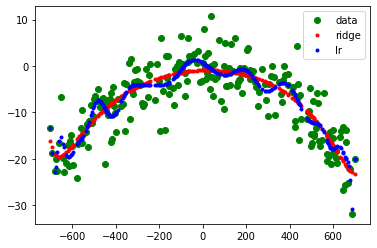

In [43]:
pipe_lr.fit(X_train, y_train)
pipe_ridge.fit(X_train, y_train)

y_pred_lr = pipe_lr.predict(X_train)
y_pred_ridge = pipe_ridge.predict(X_train)

import matplotlib.pyplot as plt

plt.plot(X_train, y_train, 'o', color='green', label='data')
plt.plot(X_train, y_pred_ridge, 'o', color='red', label='ridge', ms=3)
plt.plot(X_train, y_pred_lr, 'o', color='blue', label='lr', ms=3)

plt.legend()

plt.show()

**Problem 2**

1. Use the standard [Pandas csv-files reader](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to load data from the following url: 

  "https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/df_2.csv". 

  Save the resulting data frame as `df_2`.

In [15]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/df_2.csv')

2. Now, let's do some basic data exploration, similar to the one we did in the previous problem. Begin by checking the shape of the data frame.

In [16]:
df_2.shape

(300, 2)

 3. Demonstrate that the columns names are `x_values` and `y_values`.

In [17]:
df_2.columns

Index(['x_values', 'y_values'], dtype='object')

3. Convert each columns of the data frame into a one dimensional NumPy array (*hint:* use the `values` attribute). Then count the number of missing values in each of the arrays.

In [18]:
na_x = np.count_nonzero(np.isnan(df_2['x_values'].values))
na_y = np.count_nonzero(np.isnan(df_2['y_values'].values))

print(f"The number of missing values in the 'x_values' column is {na_x}.")
print(f"The number of missing values in the 'y_values' column is {na_y}.")

The number of missing values in the 'x_values' column is 0.
The number of missing values in the 'y_values' column is 48.


4. Use the same approach as in the previous problem to remove the missing values from the data frame.

In [19]:
df_2.dropna(inplace=True)

5. Demonstrate that now `df_2` does not contain any missing values.

In [20]:
na_x = np.count_nonzero(np.isnan(df_2['x_values'].values))
na_y = np.count_nonzero(np.isnan(df_2['y_values'].values))

print(f"The number of missing values in the 'x_values' column is {na_x}.")
print(f"The number of missing values in the 'y_values' column is {na_y}.")

The number of missing values in the 'x_values' column is 0.
The number of missing values in the 'y_values' column is 0.


6. The Pandas function that removes the missing values also removes the corresponding implicit indices, so that the new implicit index of the data frame has gaps. For this problem, this is not the behavior we want, so we need to reset the implicit index. This can be done by running the [following command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html): 

  `df_2.reset_index(drop=True, inplace=True)`

  Run this command to reset the implicit index of `df_2`.

In [21]:
df_2.reset_index(drop=True, inplace=True)

7. Determine the smallest and the largest values present in each of the columns of the data frame (do it in the same way how you did it in the previous problem).

In [22]:
print(f"The smallest element in the 'x_values' column is {df_2['x_values'].min():.3f}")
print(f"The largest element in the 'x_values' column is {df_2['x_values'].max():.3f}")
print(f"The smallest element in the 'y_values' column is {df_2['y_values'].min():.3f}")
print(f"The largest element in the 'y_values' column is {df_2['y_values'].max():.3f}")

The smallest element in the 'x_values' column is -19.732
The largest element in the 'x_values' column is 20.000
The smallest element in the 'y_values' column is -4.835
The largest element in the 'y_values' column is 3.428


8. Print to the screen all elements of the `y_values` column with the implicit index in the range $[67, 74]$ (note that both limits are inclusive). Don't forget to use the `iloc` attribute.

In [23]:
df_2.iloc[67:75, 1]

67   -0.064559
68    2.061626
69   -0.879507
70   -0.552109
71    0.856761
72    0.003662
73   -0.861319
74   -0.902649
Name: y_values, dtype: float64

9. Build a scikit-learn pipeline called `pipe` containing the following steps:  
  * creating new polynomial features: do not include the feature of degree zero and do not specify the `degree` parameter, just leave it at its default value;
  * scaling the data using the standard scaler approach;
  * performing `LinearRegression()`.

In [24]:
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('lr', LinearRegression())
                 ])

10. Your next objective is going to be to find the best polynomial degree to fit these mystery data by exploring all polynomial degrees in the range from 1 to 30. You will be using the scikit-learn `GridSearchCV()` class -- please refer to our lecture notes for an example and also get yourself familiar with the [sklearn description page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for this class. 

  First of all, load this class from the scikit-learn library and create a new instance of this class called `gs`. Use the pipeline you created earlier as your `estimator`; set `param_grid = {'poly__degree': np.arange(1, 31)}`, `cv=5` (5-fold cross-validation), and `scoring='neg_root_mean_squared_error'`.

In [25]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipe, param_grid = {'poly__degree': np.arange(1, 31)}, cv=5, scoring='neg_root_mean_squared_error')

11. Fit the `gs` instance on all data of the `df_2` data frame treating `x_values` as your features and `y_values` as your labels (recall, that you can always turn a column of a Pandas data frame into a NumPy array by applying the `values` attribute; also, don't forget to reshape the features). After that print to the screen the best polynomial degree found by the grid search.

In [26]:
gs.fit(df_2['x_values'].values.reshape(-1, 1), df_2['y_values'].values)

# Printing the best parameters
gs.best_params_

{'poly__degree': 5}

12. Compute the predicted values `y_pred` (`gs`'s `predict` method will use the best parameter(s) automatically) on the given feature values (the entries of the `x_values` column of `df_2`). After than compute the $\text{RMSE}$ and $R^2$ scores (for an example refer to the lecture notes). Print these scores to the screen (show only 3 decimals).

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = gs.predict(df_2['x_values'].values.reshape(-1, 1))

rmse = mean_squared_error(df_2['y_values'].values, y_pred)**0.5
r2 = r2_score(df_2['y_values'].values, y_pred)

print(f"The RMSE score is {rmse:.3f}.")
print(f"The R^2 score is {r2:.3f}.")

The RMSE score is 0.718.
The R^2 score is 0.694.


13. Create two scatter plots on the same set of axes: one showing the original data points in blue and another showing the predicted points in red. I am leaving it up to you how you want to label the plot and what kind of title you would like to use.

  Do your predictions look reasonable? 

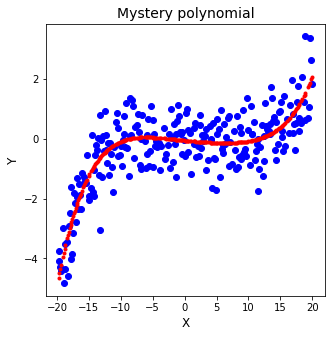

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.plot(df_2['x_values'].values, df_2['y_values'].values, 'o', color='blue')
plt.plot(df_2['x_values'].values, y_pred, 'o', color='red', ms=3)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)

plt.title('Mystery polynomial', fontsize=14)

plt.show()

Yes, the plot looks very reasonable -- the grid search algorithm did a very good job finding the best polynomial degree for these data.